# Time Series Forcasting

In time series forcasting (TSF) the goal is to predict the future values using the behaviour of data in the past. We can use some of the tehniques we learned about in the last notebook. For instance, Holt-Winters methods can e used for forcasting as well as analysis.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
df = pd.read_csv('../../data/processed/Customers.csv',parse_dates=True,index_col = 'Month')

In [52]:
df

,Customers
Month,
1994-01-01,412
1994-02-01,406
1994-03-01,456
1994-04-01,440
1994-05-01,422
...,...
2005-08-01,2070
2005-09-01,1738
2005-10-01,1578


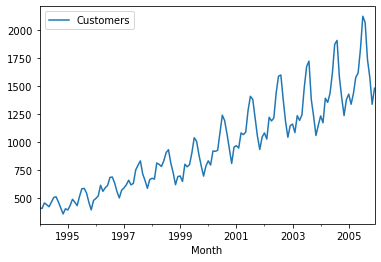

In [53]:
df.plot()

In forcasting we try to predict the next step, therefore it is essential that we specify the frequency of data so the model knows what we mean by next step. Pandas data frames have frequency property, which by default is not set. So we need to set the frequency manually. <br>
We can find information about the frequency in index of data frame.

In [55]:
df.index

DatetimeIndex(['1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
               '1994-09-01', '1994-10-01',
               ...
               '2005-03-01', '2005-04-01', '2005-05-01', '2005-06-01',
               '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

You can see at the bottom `freq` is set to `None`. We need to specify the the data is monthly and the dates are start of the month. So we use `freq = "MS"`.

In [56]:
df.index.freq = 'MS'

__Note:__ Most of the algorithms have ways of infering the frequency if it is not set. But it is always safer to set it ourselves rather than leave it for the algorithms to figure out.

To measure whether we are doing well in our prediction or not, commonly we split the data into two parts, one for training the model and the other for evaluating the forcasting quality. The part that is used for taining is called training set and for time series it usually is the data from the beginning up to a certain point in time. The part that is used for evaluation is may be called validation set, test set, or evaluation set. The validation set comes right after the training set, because we use the training set to understand the behaviour of data and then we want to know what is going to happen right after that.<br>
Let's split our data into training and validation set. Let's split in a way so that last 24 months are in validation set and the rest in training set.

In [60]:
n_months = 24
df_train = df.iloc[:-n_months]
df_valid = df.iloc[-n_months:]

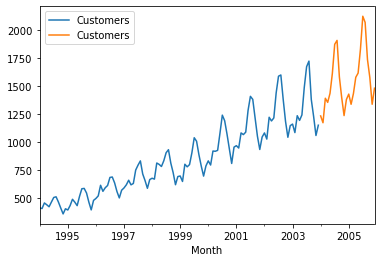

In [61]:
ax = df_train.plot(legend = True, label = 'Train')
df_valid.plot(ax =ax, legend = True, label = 'Validation')

In [80]:
model = ExponentialSmoothing(df_train['Customers'],trend = 'mul', seasonal = 'mul',seasonal_periods= 12)
trained_model = model.fit(smoothing_level=.3,smoothing_slope=.3,smoothing_seasonal=.3)

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [91]:
forecast = trained_model.forecast(24)

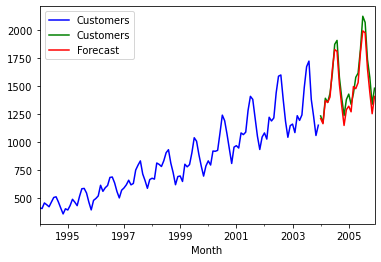

In [92]:
ax = df_train.plot(legend = True, label = 'Train', color = 'blue')
df_valid.plot(ax =ax, legend = True, label = 'Validation', color = 'green')
forecast.plot(ax=ax, legend=True, label = 'Forecast', color = 'red')

Let's have a closer look.

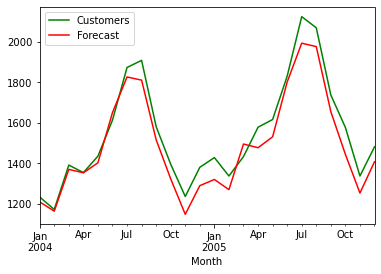

In [93]:
ax = df_valid.plot( legend = True, label = 'Validation', color = 'green')
forecast.plot(ax=ax, legend=True, label = 'Forecast', color = 'red')

It's pretty close. But how close? We need to put a value on the goodness of the result. To do this, we can use metrics. There are various metrics which can be used here, such as root of mean squared error (RMSE), mean squered error (MSE), mean absolute error (MAE), $R^2$, and many more. Sometimes for a certain application you might need to use particular metric.<br>
There is a package called Scikit Learn which is a common package for machine learning and data science. This package contains many useful functions and algorithms. One of them is metrics submodule where various types of metrics are available. 

In [96]:
from sklearn.metrics import mean_absolute_error as mae

Most of Scikit Learn metric functions need the same inputs. We need to pass in the actual values, and the predicted values.<br>


In [113]:
??mae

In [95]:
mae(y_true=df_valid,y_pred=forecast)

68.11273064785662

This value shows on average how much our forecast was off from the reality. <br>


__Change the value of alpha, beta, and gamma and see whether it improves the model.__

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


142.14374535228487

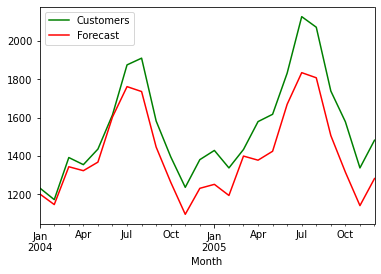

In [119]:
alpha = .4
beta = .3
gamma = .3
model = ExponentialSmoothing(df_train['Customers'],trend = 'mul', seasonal = 'mul',seasonal_periods= 12)
trained_model = model.fit(smoothing_level = alpha ,smoothing_slope = beta ,smoothing_seasonal = gamma)
forecast = trained_model.forecast(24)
ax = df_valid.plot( legend = True, label = 'Validation', color = 'green')
forecast.plot(ax=ax, legend=True, label = 'Forecast', color = 'red')
mae(y_true=df_valid,y_pred=forecast)

## Stationarity
A time series is considered stationary when its properties (mean and standard deviation) does not change with time. Therefore, any time series with trend or seasonality is not stationary. An example of stationary data is white noise:

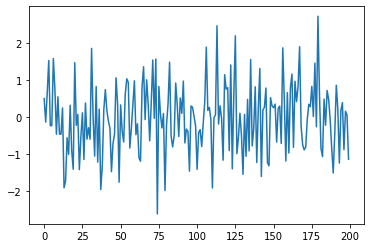

In [125]:
np.random.seed(42)
y = np.random.randn(200)
plt.plot(y);

While it is easy to tell if a time series is not stationary when there is a clear trend, in some cases it might be pretty difficult to decide whether a time series is stationary or not. Therefore, we use statistical tests to make a decision.


#### Augmented Dickey-Fuller test
[Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) (ADF) is a statistical test for stationarity. We are not going to discuss the statistical details of this test, but what matters to us is the result. The null hpothesis of ADF is that there is a [unit root](https://en.wikipedia.org/wiki/Unit_root) in the time series. The alternative hypothesis is that the series is stationary. To use the test we are looking for the p-value. If p-value is lower than a hreshold (commonly 0.05), it means the null hypothesis is rejected and therefore the time series is stationary.<br>
Let's test it on our data.

In [132]:
from statsmodels.tsa.stattools import adfuller

In [133]:
adfuller(df)

(0.8501837118218631,
 0.9924045241642752,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 1311.795141838217)

The function returns many values, but the one that we are interested in is p-value, which the second value. If it is less than 0.05, it means time series is stationary. In this case it is far from 0.05 and that is what we expected as the data has clear trend.<br>
Now let's turn it into a function that only return the p-value and run the test on white noise.

In [146]:
def adf(data):
    res = adfuller(data)
    return res[1]

In [147]:
adf(y)

2.543125112212854e-27

The value is very small, which suggests we can reject the null hypothesis and therefore the series is stationary.

What if we remove trend and seasonality from the data using STL method?

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose

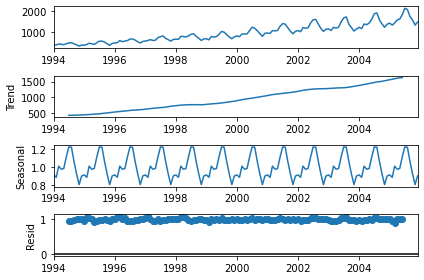

In [139]:
res = seasonal_decompose(df,model='mul')
res.plot();

If we remove the seasonal and trend component what is left is the residuals.<br>
The residuals might have `NaN` in it. If so, we need to remove them before performing the test.

In [150]:
adf(res.resid.dropna())

8.875932753157597e-11

The residual is stationary.

__Why is it important if a time series is stationary or not?__<br>
We know that in a stationary time series the characteristics will remain constant. This makes it easier to predict their future behaviour as we expect them to behave similarly. But when the series is not stationary we don't know how it is going to behave in the future. In reality, most of the time series we are going to work with are not stationary. But using various techniques we might be able to transform them into a stationary time series. This is exactly what we just did. We use STL to remove the trend and seasonality to get a stationary time series.

Another technique to make a time series stationary is differencing. Differencing means that we calculate the difference between two consecutive points in time. Then we use the differences for forcasting.<br>
Let's see how differencing will affect our data. Pandas has a builtin method for differencing (`.diff()`):

In [159]:
df.diff()

,Customers
Month,
1994-01-01,NaN
1994-02-01,-6.0
1994-03-01,50.0
1994-04-01,-16.0
1994-05-01,-18.0
...,...
2005-08-01,-55.0
2005-09-01,-332.0
2005-10-01,-160.0


We need to get rid of `NaN` so we can run the test.

In [160]:
adf(df.diff().dropna())

0.048197113160884125

As we can see p-value is just below 0.05 threshold, which means differencing helped to convert data into stationary time series. <br>
In some cases you might need to perform differencing multiple times to reach stationary results.

In [191]:
adf(df.diff(2).dropna())

0.03402856442850885

## Autocorrelation

Another characteristics of a time series is autocorrelation. Autocorrelation is simply the correlation between the points in the time series and the points before them (sometimes called lagged values).

In [151]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

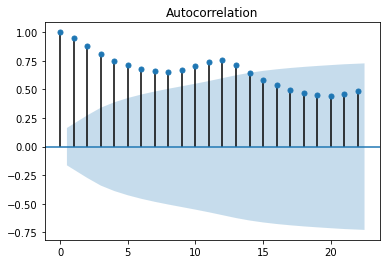

In [189]:
plot_acf(df);

The points closer together in time have higher correlation compared to the points further apart. This is an expected behaviour. However, how quickly does the corrlation decreases is important.

## Autoregressive models (AR)
An [autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model), is a time series model which assumes a linear relationship between each point in time and its past $p$ points.

$$y_t=c+\sum_{i=1}^{p}\phi_iy_{t-i}$$
For instance a first order AR (also shown as AR(1)) can be written as:<br>
$$y_t=c+\phi_1 y_{t-1}$$
This model can be found in statsmodels in ar_model submodule.

In [349]:
# This is to avoid some warning messages from statsmodels
import warnings
warnings.filterwarnings('ignore',category= FutureWarning)


In [350]:
from statsmodels.tsa.ar_model import AR,ARResults


Let's try an AR model on our data. First we need to split the data into a training and validation set.

In [351]:
stat = df
df_train = stat.iloc[:-24]
df_valid = stat.iloc[-24:]

Then we create an instance of AR model using the training data.

In [352]:
model = AR(df_train)

Then we train the model specifying the order of AR. Let's start by trying `1`.

In [353]:
trained_model = model.fit(maxlag=1)

Now the model is trained. We can view model's values:

In [354]:
trained_model.params

const           48.252098
L1.Customers     0.949977
dtype: float64

More importantly, we can forecast using the trained model. To do that, we need to at which time-step in the training data the model should stat and at which time-step it should stop. Since we want the predictions for validation data, we need to start right after last index of training data, so we use starting index as `len(df_train)` (Note that indexing starts from `0`).<br> Likewise, the last index would be sum of the lengths of training and validation sets.

In [355]:
start = len(df_train)
end = len(df_train)+len(df_valid)-1
forecast = trained_model.predict(start,end)


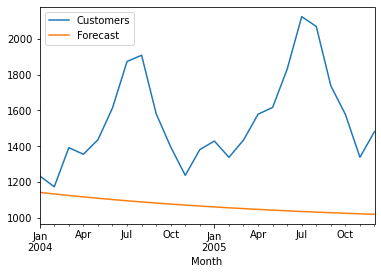

In [356]:
ax=df_valid.plot(legend = True,label='Actual')
forecast.plot(ax=ax,legend=True,label='Forecast')

That's not so good! Let's calculate mean absolute error:

In [338]:
mae(df_valid,forecast)

478.53077066492347

Now let's try larger models by increasing order of AR. 

428.4713159959576

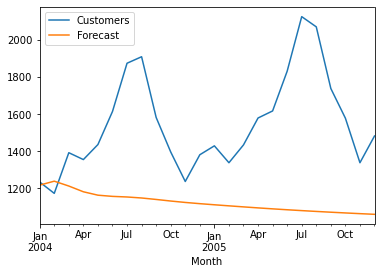

In [344]:
model = AR(df_train)
model = model.fit(maxlag=4)
start = len(df_train)
end = len(df_train)+len(df_valid)-1
forecast = model.predict(start,end)
ax=df_valid.plot(legend = True,label='Actual')
forecast.plot(ax=ax,legend=True,label='Forecast')
mae(df_valid,forecast)

Try a few other values yourself and see if you get a better result.

125.77217584412237

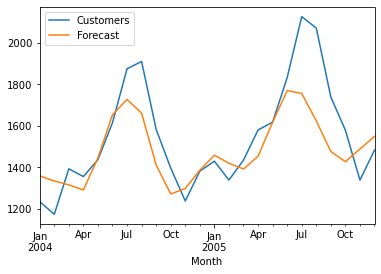

In [345]:
model = AR(df_train)
model = model.fit(maxlag=10)
start = len(df_train)
end = len(df_train)+len(df_valid)-1
forecast = model.predict(start,end)
ax=df_valid.plot(legend = True,label='Actual')
forecast.plot(ax=ax,legend=True,label='Forecast')
mae(df_valid,forecast)

## ARMA and ARIMA
An autoregressive moving average (ARMA) model is model made of two components, a autoregressive model (AR) and a [moving average model](https://en.wikipedia.org/wiki/Moving-average_model) (MA).

$$y_t = c + \varepsilon_t +  \sum_{i=1}^p \varphi_i y_{t-i} + \sum_{i=1}^q \theta_i \varepsilon_{t-i}$$
There is also a generalisation of ARMA, which is called autoregressive integrated moving average (ARIMA). ARIMA is simlar to ARMA except is has the integrated term which is referring to ARIMA'a ability to take a difference of the data as well. As we dicussed taking a difference of data can turn it into a stationary time series. ARIMA has the ability to do it automatically. When training an ARIMA model we need to specify three values:
1. order of AR ($p$)
2. order of differencing ($d$)
3. order of moving average ($q$)

When $d = 0$, ARIMA will turn into ARMA model. Statsmodels has an implementation of ARIMA which we can use for training ARMA and ARIMA models.

In [406]:
from statsmodels.tsa.arima_model import ARIMA

543.3240395303753

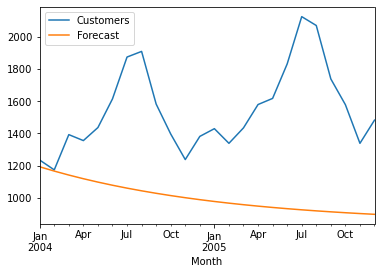

In [367]:
stat = df.diff(1).dropna()
stat = df
df_train = stat.iloc[:-24]
df_valid = stat.iloc[-24:]
p=1
d=0
q=1
model = ARIMA(df_train,(p,d,q))
model = model.fit()
start = len(df_train)
end = len(df_train)+len(df_valid)-1
forecast = model.predict(start,end)
ax=df_valid.plot(legend = True,label='Actual')
forecast.plot(ax=ax,legend=True,label='Forecast')
mae(df_valid,forecast)

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\bas

6513.183710133972

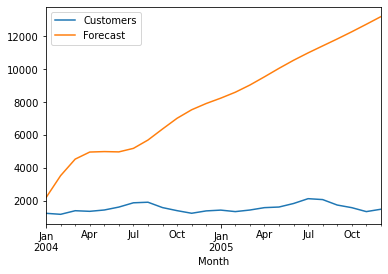

In [440]:
stat = df.diff(1).dropna()
stat = df
df_train = stat.iloc[:-24]
df_valid = stat.iloc[-24:]
p=4
d=0
q=2
model = ARIMA(df_train,(p,d,q))
model = model.fit()
start = len(df_train)
end = len(df_train)+len(df_valid)-1
forecast = model.predict(start,end)
ax=df_valid.plot(legend = True,label='Actual')
forecast.plot(ax=ax,legend=True,label='Forecast')
mae(df_valid,forecast)

In [368]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Customers   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -713.394
Method:                       css-mle   S.D. of innovations             91.349
Date:                Sun, 12 Jul 2020   AIC                           1434.789
Time:                        19:11:19   BIC                           1445.939
Sample:                    01-01-1994   HQIC                          1439.317
                         - 12-01-2003                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             838.5439    140.219      5.980      0.000     563.720    1113.368
ar.L1.Customers     0.9247      0.036     25.999      0.000       0.855       0.994
ma.L1.Customers     0.3926      0.099      3.956      0.000       0.198       0.587
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0815           +0.0000j            1.0815            0.0000
MA.1           -2.5470           +0.0000j            2.5470            0.5000
-----------------------------------------------------------------------------
"""

While we can easily get the forecasted values from an ARMA model, when working with ARIMA models we need to add a few extra steps. To get the forecasted values of ARMA model we used `.predict()` in code above. But this method does not inverse the differencing operation (which is part of ARIMA). However, there is another method called `.forecast()` which does inversion. <br>
There is another difference between `predict` and `forecast`. `predict` uses the points that we have and predicts a single time-step ahead. So when we ask predict to do more than one step, at each step it uses the actual data. `forecast` uses the model trained on the training set and produces new values.

Here we recreate the predict function for ARIMA by training the model on the entire history of data, and then forcast one step ahead and then retrain the model using the entire data up to that point again.

In [441]:
from tqdm import tqdm

 25%|██▌       | 6/24 [00:03<00:10,  1.76it/s]C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
100%|██████████| 24/24 [00:09<00:00,  2.48it/s]


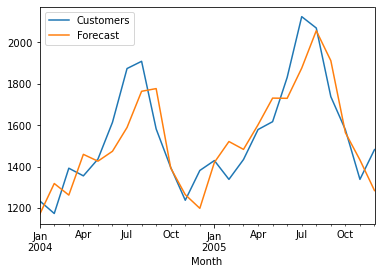

In [439]:
p = 2
d = 1
q = 2


df_train = df.iloc[:-24]
df_valid = df.iloc[-24:]
df_valid=df_valid.assign(Forecast=0)
history = [x for x in df_train['Customers']]

for t in tqdm(range(len(df_valid))):
    model = ARIMA(history, order=(p,d,q))
    trained_model = model.fit(disp=0)
    output = trained_model.forecast()
    pred = output[0]
    df_valid['Forecast'][t] = pred
    history.append(df_valid.values[t,0])
df_valid.plot()

In [443]:
from pmdarima import auto_arima


In [453]:
res = auto_arima(df,error_action='ignore')

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [455]:
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -656.664
Date:                              Sun, 12 Jul 2020   AIC                           1333.327
Time:                                      20:28:49   BIC                           1362.079
Sample:                                           0   HQIC                          1345.011
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9547      0.569      1.678      0.093      -0.160       2.070
ar.L1         -0.2194      0.091     -2.400      0.016      -0.399      -0.040
ar.L2         -0.1679      0.098     -1.721      0.085      -0.359       0.023
ar.L3          0.7106      0.094      7.560      0.000       0.526       0.895
ma.L1         -0.1081      2.960     -0.037      0.971      -5.910       5.693
ma.L2          0.1045      2.644      0.040      0.968      -5.079       5.288
ma.L3         -0.9958      3.020     -0.330      0.742      -6.914       4.923
ar.S.L12      -0.9913      0.125     -7.940      0.000      -1.236      -0.747
ma.S.L12       0.9471      0.396      2.393      0.017       0.171       1.723
sigma2      1193.3862   3622.384      0.329      0.742   -5906.356    8293.129
===================================================================================
Ljung-Box (Q):                       39.46   Jarque-Bera (JB):                10.22
Prob(Q):                              0.49   Prob(JB):                         0.01
Heteroskedasticity (H):               2.03   Skew:                             0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Seasonal ARIMA (SARIMA)
As the name suggest this model is the same as ARIMA but adjusted to deal with seasonality. To train a SARIMA we need to sets of parameters. The first set is the ARIMA parameters ($p$,$d$,$q$), and the second set is for seasonality ($P$,$D$,$Q$,$m$). $P$,$D$, and $Q$ are orders of autoregressive, differencing, moving average component of seasonality and $m$ is the length of seasonality.<br>
To train a SARIMA model we use a submodule of statsmodels called `SARIMAX` (we will get to what the "X" means shortly).


In [452]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [469]:
p = 2
d = 1
q = 2

P = 1
D = 1
Q = 1
m= 12

df_train = df.iloc[:-24]
df_valid = df.iloc[-24:]

model = SARIMAX(df_train,order = (p,d,q),seasonal_order=(P,D,Q,m))
trained_model = model.fit()

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [470]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Customers   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -527.866
Date:                              Sun, 12 Jul 2020   AIC                           1069.731
Time:                                      20:50:25   BIC                           1088.441
Sample:                                  01-01-1994   HQIC                          1077.316
                                       - 12-01-2003                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2763      0.440      0.627      0.530      -0.587       1.140
ar.L2          0.5215      0.382      1.364      0.173      -0.228       1.271
ma.L1         -0.5681      0.473     -1.201      0.230      -1.496       0.359
ma.L2         -0.4271      0.484     -0.883      0.377      -1.375       0.521
ar.S.L12      -0.9190      0.330     -2.786      0.005      -1.565      -0.273
ma.S.L12       0.8496      0.430      1.975      0.048       0.007       1.693
sigma2      1100.3370    206.321      5.333      0.000     695.955    1504.719
===================================================================================
Ljung-Box (Q):                       42.30   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.37   Prob(JB):                         0.26
Heteroskedasticity (H):               1.47   Skew:                            -0.03
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [471]:
start=len(df_train)
end=len(df_train)+len(df_valid)-1
pred = trained_model.predict(start=start, end=end, dynamic=False, typ='levels')

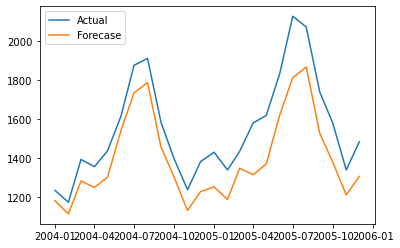

In [473]:
plt.plot(df_valid, label = 'Actual')
plt.plot(pred, label='Forecase')
plt.legend()

We can use auto_arima to find the best parameters for SARIMA as well. We just need to specify the season length ($m$) and it will search for seasonal parameters as well. Note that since there more parameters to find the process might take longer.

In [463]:
trained_model = auto_arima(df,error_action='ignore',m=12)
trained_model.summary()

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -656.664
Date:                              Sun, 12 Jul 2020   AIC                           1333.327
Time:                                      20:41:34   BIC                           1362.079
Sample:                                           0   HQIC                          1345.011
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9547      0.569      1.678      0.093      -0.160       2.070
ar.L1         -0.2194      0.091     -2.400      0.016      -0.399      -0.040
ar.L2         -0.1679      0.098     -1.721      0.085      -0.359       0.023
ar.L3          0.7106      0.094      7.560      0.000       0.526       0.895
ma.L1         -0.1081      2.960     -0.037      0.971      -5.910       5.693
ma.L2          0.1045      2.644      0.040      0.968      -5.079       5.288
ma.L3         -0.9958      3.020     -0.330      0.742      -6.914       4.923
ar.S.L12      -0.9913      0.125     -7.940      0.000      -1.236      -0.747
ma.S.L12       0.9471      0.396      2.393      0.017       0.171       1.723
sigma2      1193.3862   3622.384      0.329      0.742   -5906.356    8293.129
===================================================================================
Ljung-Box (Q):                       39.46   Jarque-Bera (JB):                10.22
Prob(Q):                              0.49   Prob(JB):                         0.01
Heteroskedasticity (H):               2.03   Skew:                             0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The summary shows the best values for SARIMA model. You can also see the values used in the model (in AR, MA, etc) and their statistics.

## SARIMAX
SARIMAX is a SARIMA model with exogenous regressors. 

In [508]:

df_train = df.iloc[:-24]
df_valid = df.iloc[-24:]
x = np.linspace(0,100,1000)
y = np.log(df_train['Customers'].values)
z = df_train['Customers'].values

In [509]:
model = SARIMAX(z,y,order=(2,1,2), seasonal_order=(2,0,2,12))

In [510]:
res = model.fit()

C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Pooya\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [502]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -509.898
Date:                            Sun, 12 Jul 2020   AIC                           1039.796
Time:                                    21:12:55   BIC                           1067.587
Sample:                                         0   HQIC                          1051.081
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           861.3404     32.251     26.707      0.000     798.130     924.551
ar.L1          1.4255      1.634      0.873      0.383      -1.777       4.628
ar.L2         -0.4925      1.196     -0.412      0.680      -2.836       1.851
ma.L1         -1.6415      1.613     -1.018      0.309      -4.803       1.520
ma.L2          0.6597      1.478      0.446      0.655      -2.238       3.557
ar.S.L12       1.8446      0.186      9.895      0.000       1.479       2.210
ar.S.L24      -0.9052      0.152     -5.965      0.000      -1.203      -0.608
ma.S.L12      -0.9543      0.318     -2.999      0.003      -1.578      -0.331
ma.S.L24       0.1975      0.213      0.927      0.354      -0.220       0.615
sigma2       244.8553     38.315      6.391      0.000     169.759     319.952
===================================================================================
Ljung-Box (Q):                       35.10   Jarque-Bera (JB):                11.83
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.55
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [512]:
start=len(df_train)
end=len(df_train)+len(df_valid)-1
pred = res.predict(start=start, end=end, dynamic=False, exog = np.log(df_valid['Customers'].values))

array([1220.97297391, 1163.65783853, 1359.02219835, 1323.9723233 ,
       1388.62812576, 1580.78919018, 1790.89878949, 1831.88680034,
       1525.35791023, 1362.50309355, 1212.32088596, 1333.2642226 ,
       1372.4981513 , 1301.81306826, 1410.31499016, 1480.7384007 ,
       1515.59534023, 1710.95575952, 1916.4570874 , 1921.30464198,
       1628.78412643, 1493.35067742, 1303.2155838 , 1419.02238924])

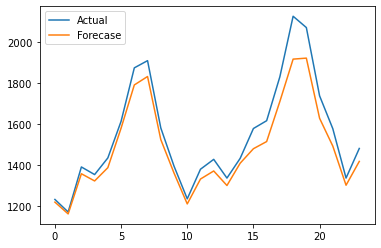

In [515]:
plt.plot(df_valid.values, label = 'Actual')
plt.plot(pred, label='Forecase')
plt.legend()

# Prophet
Prophet is a time series analysis and forecasting package developed by Facebook. Prophet allows you to train forscasting models with minimal need to adjust the models patameters. Prophet is particularly useful when you are dealing with data that has multiple levels of seasonality.

In [516]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

ModuleNotFoundError: No module named 'fbprophet'

In [517]:
block_0_df = pd.read_csv("../../data/processed/halfhourly_dataset/halfhourly_dataset/block_0.csv")

,Customers
Month,
1994-01-01,412
1994-02-01,406
1994-03-01,456
1994-04-01,440
1994-05-01,422
...,...
2005-08-01,2070
2005-09-01,1738
2005-10-01,1578


In [ ]:
block_0_df.head()

In [ ]:
block_0_df.index = block_0_df['tstp'].astype("datetime64")

In [ ]:
block_0_df.loc[block_0_df["energy(kWh/hh)"] == "Null","energy(kWh/hh)"]=0

In [ ]:
block_0_df["energy(kWh/hh)"] = block_0_df["energy(kWh/hh)"].astype("float64")

In [ ]:
block0 = block_0_df.groupby(by=block_0_df.index).mean()

In [ ]:
block0.plot()

In [ ]:
block0 = block0.resample('D').sum()

In [ ]:
df = pd.DataFrame({'ds':block0.index,'y':block0['energy(kWh/hh)']})

In [ ]:
model = Prophet()
model.fit(df)

In [ ]:
future = model.make_future_dataframe(periods = 365)

In [ ]:
forecast = model.predict(future)

In [ ]:
model.plot(forecast);

In [ ]:
model.plot_components(forecast);

In [ ]:
# Cross validation
df_cv = cross_validation(model, initial='365 days', period='90 days', horizon = '90 days')

In [ ]:
df_cv.head()

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(20)

In [ ]:
errors = df_p.groupby('horizon').mean()
errors

In [ ]:
plt.plot(range(9,91),errors[['mape']])
plt.legend(['mape'])

In [ ]:
holiday_df = pd.read_csv("../input/uk_bank_holidays.csv", names=("ds", "holiday"), header=0)
holiday_df.head()
model = Prophet(holidays=holiday_df)
model.fit(df)

# Cross validation
df_cv = cross_validation(model, initial='365 days', period='90 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
errors2 = df_p.groupby('horizon').mean()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(9,91),errors2['mape'],label = '+ holidays')
plt.plot(range(9,91),errors['mape'],label = '- holidays')
plt.xlim(9,30)
plt.ylim(0,.3)
plt.legend()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.ylim(0,1)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
model = Prophet(changepoint_prior_scale=0.1)
model.fit(df)
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)